In [1]:
#### QUESTION 1 ####

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [3]:
### 1. Load the data
LeafData = pd.read_csv('LeafData.csv',header=None)

# Extracting and Normalizing Features
LeafFeatures = np.array(LeafData.iloc[:,1:])
LeafFeaturesNorm = StandardScaler().fit_transform(LeafFeatures)

# Extract and Converting Target values for comparison with clusters
mymap = {'Acer Capillipes':0, 'Betula Austrosinensis':1, 'Castanea Sativa':2, 'Cytisus Battandieri':3, 
         'Eucalyptus Glaucescens':4,'Ginkgo Biloba':5,'Ilex Cornuta':6,'Magnolia Salicifolia':7,
        'Populus Adenopoda':8,'Tilia Platyphyllos':9}
y = LeafData.applymap(lambda s: mymap.get(s) if s in mymap else s)
y = np.array(y.iloc[:,0])

In [4]:
### 2. Dimension Reduction
LeafPCA = PCA(n_components=64)
LeafPCs = LeafPCA.fit_transform(LeafFeaturesNorm)

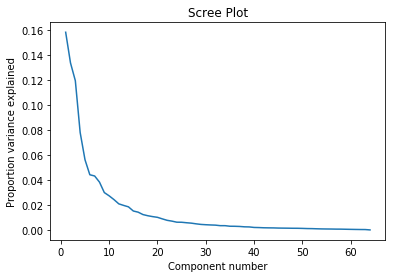

In [5]:
# Scree Plot
plt.plot(np.arange(1,65), LeafPCA.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Component number')
plt.ylabel('Proportion variance explained')
plt.show()

In [6]:
# Using Scree Plot, it was determined that there is an elblow around 20 PCs
LeafPC = LeafPCs[:,:21]

In [7]:
### 3. Perform Clustering
km = KMeans(n_clusters=10)  # defining the clustering object
km.fit(LeafPC)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means

Text(0.5, 1.0, 'True Clusters')

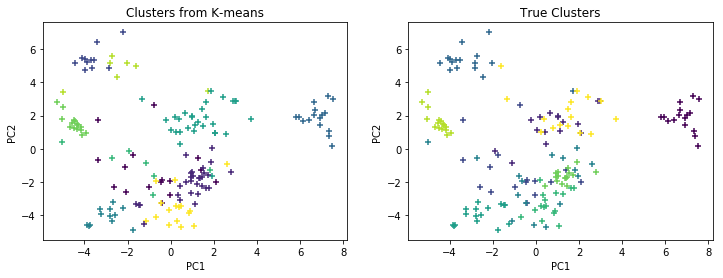

In [8]:
plt.figure(figsize=[12,4])
#Plot Clusters from K-means
plt.subplot(121)
plt.scatter(LeafPC[:,0],LeafPC[:,1],c=y_clus,marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters from K-means')
#Plot True Clusters
plt.subplot(122)
plt.scatter(LeafPC[:,0],LeafPC[:,1],c=y,marker='+')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('True Clusters')

In [9]:
### 4. Evaluate the clustering performance
print('ARI=',adjusted_rand_score(y, y_clus),sep='')
print('AMI=',adjusted_mutual_info_score(y, y_clus),sep='')

ARI=0.6050275751089724
AMI=0.7297248833749834


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [8]:
#### QUESTION 2 ####

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA,PCA

In [10]:
### 1. Load the data
ghgData = pd.read_fwf('GHG_Data.txt',header=None)

In [11]:
ghgData = ghgData.transpose()

In [12]:
### 2. Determine the number of components by performing a PCA
pca = PCA()
ghgPC = pca.fit_transform(ghgData)
nIC = np.min(np.where(np.cumsum(pca.explained_variance_ratio_)>0.9))+1
#it was determined that 9 components explained atleast 90% of variabiity

In [13]:
### 3. Perform ICA
ica = FastICA(n_components=nIC)
ghgIC = ica.fit_transform(ghgData)  

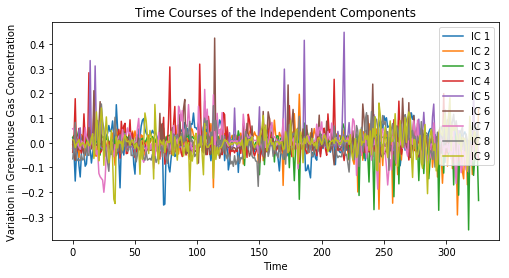

In [15]:
### 4. Plot the time courses of the independent components
plt.figure(figsize=[8,4])
for iIC in range(nIC):
    plt.plot(ghgIC[:,iIC], label = 'IC ' + str(iIC+1))
plt.title('Time Courses of the Independent Components')
plt.xlabel('Time')
plt.ylabel('Variation in Greenhouse Gas Concentration')
plt.legend()
plt.show()